# IMPORTS

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from urllib2 import urlopen
from bs4 import BeautifulSoup as bs
from datetime import datetime

# FUNÇÕES

Aqui são as funções pra transformar o texto extraído das páginas em objetos utilizáveis (datetime, float, etc)

In [5]:
def coordenadas (localizacao):
    mystring = localizacao.split(',')
    pos_latitude = mystring[0].split(' ')
    pos_longitude = mystring[1].split(' ')
    
    if pos_latitude[1] == 'N':
        latitude = float(pos_latitude[0])
    else:
        latitude = float(pos_latitude[0]) * -1
        
    if pos_longitude[1] == 'W':
        longitude = float(pos_latitude[0])
    else:
        longitude = float(pos_latitude[0]) * -1
        
    return latitude, longitude

def magicbox(magic_input):
    data_hora = datetime.strptime(magic_input[0], '%Y-%m-%d %H:%M:%S')
    magnitude = float(magic_input[1])
    latitude, longitude = coordenadas(magic_input[2])
    profundidade = float(magic_input[3].split(' ')[0])
    
    magic_output = [data_hora,magnitude,latitude,longitude,profundidade]
    return magic_output

# SET UP

Aqui, a gente abre a página (a variável page), e depois jogamos ela no interpretador (a variável soup).

Na página aberta, existem uma tag html "option" para cada terremoto, então é ele que nois vai buscar.

In [7]:
site = "http://rev.seis.sc.edu/earthquakes.html"
base_url = "http://rev.seis.sc.edu/earthquakes/?eq_url="
page = urlopen(site)

soup = bs(page, "html5lib")
options = soup.findAll("option")
print "Existem ",len(options)," terremotos registrados em rev.seis.sc.edu"

Existem  73  terremotos registrados em rev.seis.sc.edu


# COLETA DE DADOS

In [76]:
earthquakes = []
for option in options:
    myurl = base_url + option['value']
    soup = bs(urlopen(myurl))
    titems = soup.findAll('a', {'class': 'definition'})
    mylist = []
    for i in range (1,5):
        mylist.append(titems[i].parent.findNext().findNext().find(text=True))
    earthquakes.append(magicbox(mylist))

# CÁLCULOS

In [65]:
datas = []
ocorrencias = []
for quake in earthquakes:
    data = quake[0].date()
    if not data in datas:
        datas.append(data)
        ocorrencias.append(1)
    else:
        index = datas.index(data)
        ocorrencias[index] += 1

QUANTIDADE DE TERREMOTOS POR DIA

In [66]:
print '%7s %7s' % ('data','qtd')
for i in range(0,len(datas)):
    print '%s %3s' % (datas[i], ocorrencias[i])

   data     qtd
2016-10-20   6
2016-10-19   3
2016-10-18   4
2016-10-17   3
2016-10-15   2
2016-10-14   1
2016-10-13   3
2016-10-12   2
2016-10-10   3
2016-10-09   4
2016-10-08   3
2016-10-07   1
2016-09-01   1
2016-08-29   1
2016-08-19   1
2016-08-12   1
2016-07-29   1
2016-05-28   1
2016-04-28   1
2016-04-16   1
2016-04-15   1
2016-03-02   1
2016-01-30   1
2016-01-24   1
2015-12-07   1
2015-12-04   1
2015-11-24   1
2015-11-13   1
2015-10-26   1
2015-05-30   1
2015-04-25   1
2014-08-24   1
2014-06-23   1
2014-04-12   1
2014-04-01   1
2013-05-24   1
2011-08-23   1
2011-03-11   1
2010-02-27   1
2010-01-12   1
2007-04-25   2
2007-03-25   1
2007-01-13   1
2006-07-17   1
2004-12-26   1
2004-09-28   1
2002-11-03   1
1994-01-17   1
1989-10-18   1


MEDIA ARITMETICA DE TERREMOTOS POR DIA

In [74]:
print 'media: ',sum(ocorrencias)/float(len(ocorrencias))

media:  1.48979591837


MODA obviamente é 1 e mediana é 1 tambem

MEDIA ARITMETICA DAS MAGNITUDES

In [75]:
magnitudes = [quake[1] for quake in earthquakes]
media_mag = sum(magnitudes)/float(len(magnitudes))
print 'a media das magnitudes é ',media_mag

a media das magnitudes é  5.94863013699


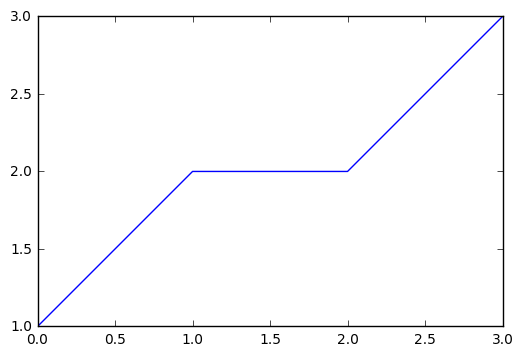

In [3]:
plt.plot([1,2,2,3])